In [8]:
#IMPORTS
import pandas as pd 
from tabulate import tabulate
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [85]:
air_data= pd.read_csv('./Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv')

air_data

,date,zip_code,ReportingArea,StateCode,Latitude,Longitude,OZONEAQI,PM2.5AQI,PM10AQI,CategoryNumber,CategoryName
0,2021-01-01,2045,Weymouth,MA,42.2459,-70.9628,NaN,40.0,NaN,1.0,Good
1,2021-01-02,2045,Weymouth,MA,42.2459,-70.9628,NaN,17.0,NaN,1.0,Good
2,2021-01-03,2045,Weymouth,MA,42.2459,-70.9628,NaN,25.0,NaN,1.0,Good
3,2021-01-04,2045,Weymouth,MA,42.2459,-70.9628,NaN,28.0,NaN,1.0,Good
4,2021-01-05,2045,Weymouth,MA,42.2459,-70.9628,NaN,20.0,NaN,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...
16395,2021-12-27,2446,Boston,MA,42.3510,-71.0510,13.0,28.0,NaN,1.0,Good
16396,2021-12-28,2446,Boston,MA,42.3510,-71.0510,15.0,42.0,NaN,1.0,Good
16397,2021-12-29,2446,Boston,MA,42.3510,-71.0510,12.0,45.0,NaN,1.0,Good
16398,2021-12-30,2446,Boston,MA,42.3510,-71.0510,3.0,55.0,NaN,1.0,Good


In [86]:
air_data.groupby(['zip_code', 'Latitude', 'Longitude'])

air_data

,date,zip_code,ReportingArea,StateCode,Latitude,Longitude,OZONEAQI,PM2.5AQI,PM10AQI,CategoryNumber,CategoryName
0,2021-01-01,2045,Weymouth,MA,42.2459,-70.9628,NaN,40.0,NaN,1.0,Good
1,2021-01-02,2045,Weymouth,MA,42.2459,-70.9628,NaN,17.0,NaN,1.0,Good
2,2021-01-03,2045,Weymouth,MA,42.2459,-70.9628,NaN,25.0,NaN,1.0,Good
3,2021-01-04,2045,Weymouth,MA,42.2459,-70.9628,NaN,28.0,NaN,1.0,Good
4,2021-01-05,2045,Weymouth,MA,42.2459,-70.9628,NaN,20.0,NaN,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...
16395,2021-12-27,2446,Boston,MA,42.3510,-71.0510,13.0,28.0,NaN,1.0,Good
16396,2021-12-28,2446,Boston,MA,42.3510,-71.0510,15.0,42.0,NaN,1.0,Good
16397,2021-12-29,2446,Boston,MA,42.3510,-71.0510,12.0,45.0,NaN,1.0,Good
16398,2021-12-30,2446,Boston,MA,42.3510,-71.0510,3.0,55.0,NaN,1.0,Good


In [87]:
unique_zip_codes = air_data['zip_code'].unique()
number_of_unique_zip_codes = len(unique_zip_codes)

print("Number of unique zip codes:", number_of_unique_zip_codes)

Number of unique zip codes: 45


In [88]:
category = air_data['CategoryName'].value_counts()

category_df = pd.DataFrame({'CategoryName': category.index, 'Count': category.values})

table = tabulate(category_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤════════════════════════════════╤═════════╕
│    │ CategoryName                   │   Count │
╞════╪════════════════════════════════╪═════════╡
│  0 │ Good                           │   15699 │
├────┼────────────────────────────────┼─────────┤
│  1 │ Moderate                       │     625 │
├────┼────────────────────────────────┼─────────┤
│  2 │ Unhealthy for Sensitive Groups │      47 │
╘════╧════════════════════════════════╧═════════╛


###  VISUALS  FOR 2021 AQI DATA
Based on the 2021 AQI data, it appears that most of the zipcodes in Boston(15K out of 16K) had Good AQI levels meaning that overall quality of air in Boston is 'Good' The following visuals below depict the AQI in a consumable manner

In [89]:
## Get the mean PM2.5 and OZONE AQI values per zip codes --> 45 total

air_data_mean= pd.read_csv('./Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv')
air_data_mean.head()

,zip_code,OZONEAQI,PM2.5AQI
0,2045,35.123636,29.016807
1,2108,31.083799,33.369863
2,2109,31.075630,33.373626
3,2110,31.083799,33.369863
4,2111,31.083799,33.369863


In [90]:
PM25 = air_data_mean.dropna(subset=['PM2.5AQI'])

boston_coords = [42.3601, -71.0589]  # Boston's latitude and longitude
m = folium.Map(location=boston_coords, zoom_start=12)


marker_cluster = MarkerCluster().add_to(m)


def get_marker_color(aqi):
    if aqi < 35:
        return 'green'

    
for index, row in PM25.iterrows():
    zip_code = row['zip_code']
    aqi = row['PM2.5AQI']
    color = get_marker_color(aqi)
    popup_text = f'<b>AQI:</b> {aqi}'
    folium.CircleMarker(location=boston_coords, radius= 20 , color=color, fill=True, fill_color=color, popup=popup_text).add_to(marker_cluster)

# Create a legend for AQI values
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; background-color: white; z-index: 1000; padding: 10px; border: 2px solid grey; font-size: 14px;">
    <p><strong>AQI Legend</strong></p>
    <p>AQI &lt; 35: Green (Good)</p>
</div>
"""


m.get_root().html.add_child(folium.Element(legend_html))

#display(m)

m.save("aqi_cluster_map.html")

In [91]:
# Assuming you already have 'grouped_data' containing the mean PM2.5 AQI for each zip code
# Filter out rows with NaN values in the 'PM2.5AQI' column
# Assuming you already have 'grouped_data' containing the mean PM2.5 AQI for each zip code
# Filter out rows with NaN values in the 'PM2.5AQI' column
PM25 = air_data_mean.dropna(subset=['PM2.5AQI'])

fig = px.scatter(PM25, x='zip_code', y='PM2.5AQI', size='PM2.5AQI', color='PM2.5AQI', title='Bubble Chart of PM2.5 AQI by Zip Code')

# Modify the layout to hide the legend and y-axis labels
fig.update_layout(showlegend=False)
fig.update_yaxes(visible=True)

# Save the chart as a PNG image
fig.write_image("bubble_chart.png", engine="kaleido")

# Now display the saved PNG image using matplotlib
img = plt.imread("bubble_chart.png")
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


### TRANSPORT DATA
Now that we have established the overall air quality to be 'Good' for 2021, we can explore transportation data by zipcodes to see how modes of transport can influence daily fluctations in air quality.

In [92]:
### cleaned census data for transportation #### 

census_transport = pd.read_csv('Data/Census/census_transport.csv')

census_transport.head()

,Zipcode,Estimated_Total_Population_Commuting_to_Work_16_years_and_over,"Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone","Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled",Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab),Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Walked,Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Other means,Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home,"Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone","Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled",Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab),Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked,Percent_Total_Population_Commuting_to_Work_16_years_and_over_Other means,Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home
0,2045,6055,4369,336,462,157,39,692,72.2,5.5,7.6,2.6,0.6,11.4
1,2108,2081,190,40,389,891,84,487,9.1,1.9,18.7,42.8,4.0,23.4
2,2109,2605,383,10,402,1333,80,397,14.7,0.4,15.4,51.2,3.1,15.2
3,2110,1154,294,18,138,485,14,205,25.5,1.6,12.0,42.0,1.2,17.8
4,2111,3715,514,84,578,1841,146,552,13.8,2.3,15.6,49.6,3.9,14.9


In [93]:
### Total number of Boston residents across 45 zip codes transport mediums: 
total_work = census_transport['Estimated_Total_Population_Commuting_to_Work_16_years_and_over'].mean()
total_work

12630.631578947368

So this means, an avergae of 12.6K residents that are 16 years or older using some form to public transport to work on a daily basis

In [94]:
### Further exploring each of the modes of transportation##

car_carpool = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled'].mean()
car = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'].mean()

car_total = car_carpool + car
car_totals = car_total/2

car_totals

17.43289473684211

Aprrox. 17% residents across the 45 zip codes in Boston area commute to work using a car(either driving alone or car pooling) 

In [95]:
public_transport = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
public_transport

23.46052631578947

Aprrox. 23% residents across the 45 zip codes in Boston area commute to work using a medium of public transport(train. commuter rail, bus, ferry) 

In [96]:
### WALK #####
walked = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
walked

22.376315789473686

Aprrox. 22% residents across the 45 zip codes in Boston area walk to their place of work(maybe close in proximity to place of work --> can be explored further) 

In [97]:
### WORKED FROM HOME #####
home_work = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()
home_work

14.510526315789473

Aprrox. 15% residents across the 45 zip codes in Boston area work remotely and don't use any mode of transportation.

In [98]:
## TO SUMMARIZE: Across all 45 zip codes in Boston, 16+ years fall into the following modes of transport:

other = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Other means'].mean()
car_total = car_carpool + car

# Round the percentages to two decimal places
car_total = round(car_total, 2)
public_transport = round(public_transport, 2)
walked = round(walked, 2)
home_work = round(home_work, 2)
other = round(other, 2)

# Create a dictionary with the data
data = {
    'Means of Commuting': ['Car', 'Public Transport', 'Walk', 'Worked from Home', 'Other'],
    'Average Percentage': [car_total, public_transport, walked, home_work, other]
}

# Create a DataFrame from the dictionary
commuting_df = pd.DataFrame(data)

# Convert the DataFrame to a tabular format
table = tabulate(commuting_df, headers='keys', tablefmt='fancy_grid')


print(table)

╒════╤══════════════════════╤══════════════════════╕
│    │ Means of Commuting   │   Average Percentage │
╞════╪══════════════════════╪══════════════════════╡
│  0 │ Car                  │                34.87 │
├────┼──────────────────────┼──────────────────────┤
│  1 │ Public Transport     │                23.46 │
├────┼──────────────────────┼──────────────────────┤
│  2 │ Walk                 │                22.38 │
├────┼──────────────────────┼──────────────────────┤
│  3 │ Worked from Home     │                14.51 │
├────┼──────────────────────┼──────────────────────┤
│  4 │ Other                │                 4.77 │
╘════╧══════════════════════╧══════════════════════╛


### VISUALS FOR TRANSPORT DATA
Lets expand these overall trends to understand the most common mode of transport per zip code(note graph split into 2 parts for readablity):

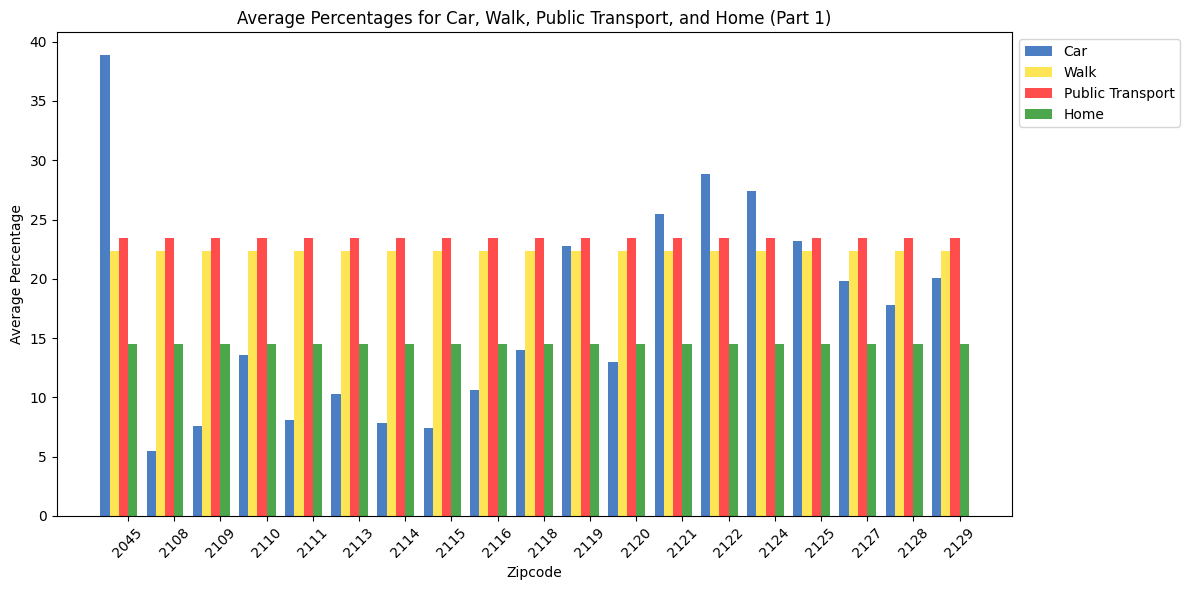

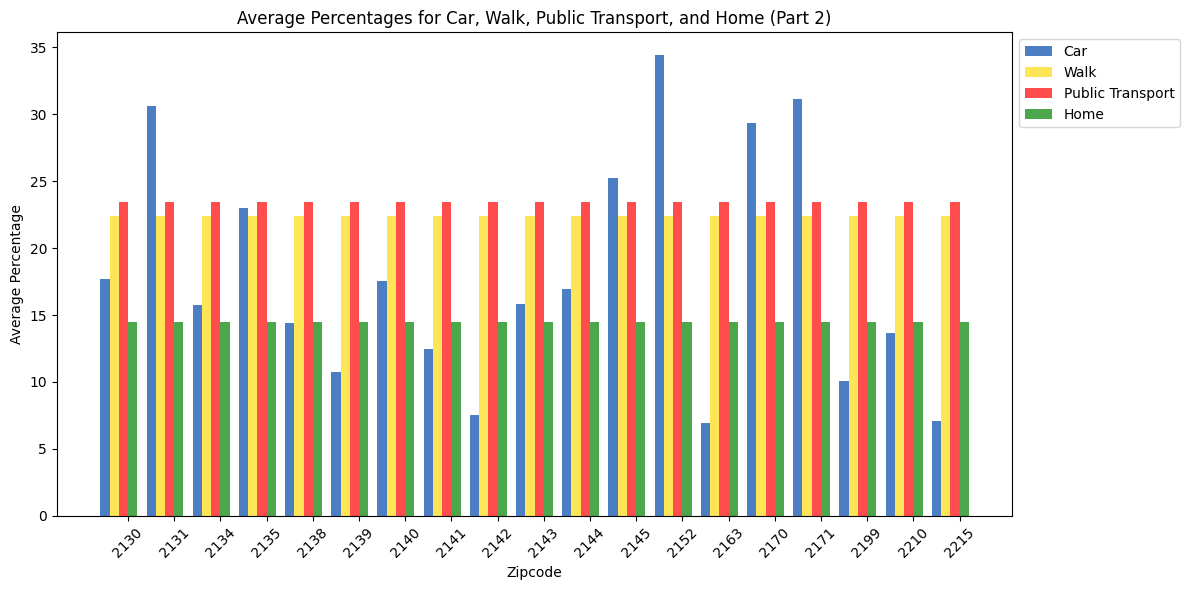

In [99]:
# Calculate the average percentages for car, walk, public transport, and home for each zipcode
census_transport['Average_Car'] = (census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'] +
                                   census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled']) / 2
census_transport['Average_Walk'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
census_transport['Average_Public_Transport'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
census_transport['Average_Home'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()

# Create an array for x-positions
x = np.arange(len(census_transport['Zipcode']))

# Set the bar width
bar_width = 0.2

# Define the gap between zipcodes
gap = 0.2

# Define the number of zipcodes to split into two graphs (e.g., half the zipcodes in each)
split_index = len(x) // 2


custom_colors = ['#0047AB', '#FDDA0D', 'red', 'green']


# Create the first grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[:split_index] - 1.5 * bar_width - gap, census_transport['Average_Car'][:split_index], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[:split_index] - 0.5 * bar_width - gap, census_transport['Average_Walk'][:split_index], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[:split_index] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][:split_index], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[:split_index] + 1.5 * bar_width - gap, census_transport['Average_Home'][:split_index], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 1)')

# Adjust the x-axis ticks and labels
plt.xticks(x[:split_index], census_transport['Zipcode'][:split_index], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Create the second grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[split_index:] - 1.5 * bar_width - gap, census_transport['Average_Car'][split_index:], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[split_index:] - 0.5 * bar_width - gap, census_transport['Average_Walk'][split_index:], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[split_index:] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][split_index:], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[split_index:] + 1.5 * bar_width - gap, census_transport['Average_Home'][split_index:], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 2)')

# Adjust the x-axis ticks and labels
plt.xticks(x[split_index:], census_transport['Zipcode'][split_index:], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Based on the grouped bar graphs above, we see that Car seems to be the most popular medium of transport, followed by public transport. What can be further studied is the impact this can have on air quality and how Boston combats this since the air quality for 3032 is relatively 'Good'

### PPI DATA
Next, lets explore PPI Data Trends to measure how proximity to roads impact residents of Boston, especially different racial groups disproportionately. 

In [100]:
ppi_df  = pd.read_csv('./Data/PPI/ppi.csv')

ppi_df

,objectid,g250m_id,commtypid,commtype,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10,ppi5,shape
0,1,144054.0,3,Maturing Suburbs,26.88,0.37,3.03,0.37,1.04,2,3C00000005000000080010006A69000020000000011000...
1,2,115030.0,3,Maturing Suburbs,33.00,0.00,14.59,0.31,2.10,1,3C00000005000000080010006A69000020000000011000...
2,3,232476.0,4,Developing Suburbs,2.66,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020000000011000...
3,4,112471.0,4,Developing Suburbs,1.34,0.00,0.04,0.02,0.00,0,3C00000005000000080010006A69000020000000011000...
4,5,148255.0,1,Inner Core,0.00,0.00,0.00,0.00,0.00,0,0C01000028000000080010006A690000B0030000011000...
...,...,...,...,...,...,...,...,...,...,...,...
62171,62172,70856.0,3,Maturing Suburbs,3.25,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020070000011000...
62172,62173,85868.0,3,Maturing Suburbs,0.00,0.00,0.00,0.00,0.00,0,4200000006000000080010006A69000026070000011000...
62173,62174,73413.0,2,Regional Urban Centers,107.08,1.19,3.08,1.81,5.06,0,3C00000005000000080010006A69000020070000011000...
62174,62175,88437.0,3,Maturing Suburbs,4.23,0.00,0.17,0.09,0.02,0,790000000F000000080010006A6900009D010000011000...


In [101]:
### PPI Average Densities for Category 0 

ppi_df.dropna(inplace=True)
ppi_df0 = ppi_df[ppi_df['ppi5'] == 0]
ppi_df0_avg = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df0_std = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df0_avg.head())


nhwhi_10    12.783550
nhaa_10      0.516185
nhapi_10     0.780224
lat_10       0.507531
nhoth_10     0.289226
dtype: float64


In [102]:
### PPI Average Densities for Category 1
ppi_df1 = ppi_df[ppi_df['ppi5'] == 1]
ppi_df1_avg = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df1_std = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df1_avg.head())


nhwhi_10    24.379456
nhaa_10      1.080559
nhapi_10     1.518334
lat_10       1.197523
nhoth_10     0.612091
dtype: float64


In [103]:
### PPI Average Densities for Category 2
ppi_df2 = ppi_df[ppi_df['ppi5'] == 2]
ppi_df2_avg = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df2_std = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df2_avg.head())

nhwhi_10    34.607915
nhaa_10      2.041301
nhapi_10     2.345419
lat_10       1.854871
nhoth_10     0.950391
dtype: float64


In [104]:
### PPI Average Densities for Category 3
ppi_df3 = ppi_df[ppi_df['ppi5'] == 3]
ppi_df3_avg = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df3_std = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df3_avg.head())

nhwhi_10    46.888427
nhaa_10      3.960835
nhapi_10     3.413472
lat_10       3.451681
nhoth_10     1.699663
dtype: float64


In [105]:
### PPI Average Densities for Category 4
ppi_df4 = ppi_df[ppi_df['ppi5'] == 4]
ppi_df4_avg = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df4_std = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df4_avg.head())

nhwhi_10    72.887019
nhaa_10      9.893672
nhapi_10     7.263983
lat_10       9.668967
nhoth_10     3.697175
dtype: float64


In [106]:
### PPI Average Densities for Category 5
ppi_df5 = ppi_df[ppi_df['ppi5'] == 5]
ppi_df5_avg = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df5_std = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df5_avg.head())

nhwhi_10    89.178365
nhaa_10     15.449001
nhapi_10    15.333186
lat_10      21.452750
nhoth_10     5.590272
dtype: float64


### VISUALS FOR PPI DATA

In [107]:
ppi_new = ppi_df['ppi5'].value_counts()
#ppi_new = ppi_new.sort_values(ascending=True)
ppi = sum(ppi_new)

print(ppi_new.head())

ppi0 = 25571 / ppi
ppi1 = 7262  / ppi
ppi2 = 7326  / ppi 
ppi3 = 7335  / ppi
ppi4 = 7340  / ppi
ppi5 = 7342  / ppi 

ppi5
0    25571
5     7342
4     7340
3     7335
2     7326
Name: count, dtype: int64


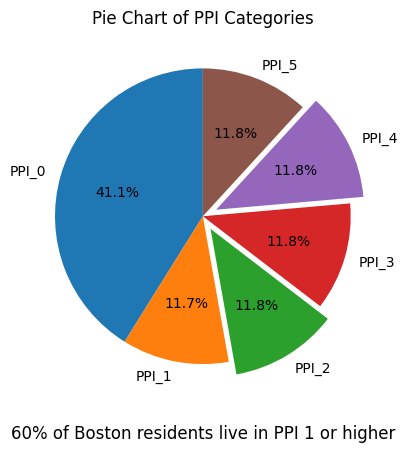

In [108]:
x = [25571, 7262, 7326, 7335, 7340, 7342]
labels = ['PPI_0', 'PPI_1', 'PPI_2', 'PPI_3', 'PPI_4', 'PPI_5']
explode = (0, 0, 0.1, 0, 0.1, 0)

# Create a pie chart with percentages displayed inside each slice
plt.pie(x, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of PPI Categories')

# Add a label
plt.text(0, -1.5, '60% of Boston residents live in PPI 1 or higher', ha='center', fontsize=12)

plt.show()

Version 1 and 2 for PPI and RACIAL GROUPS

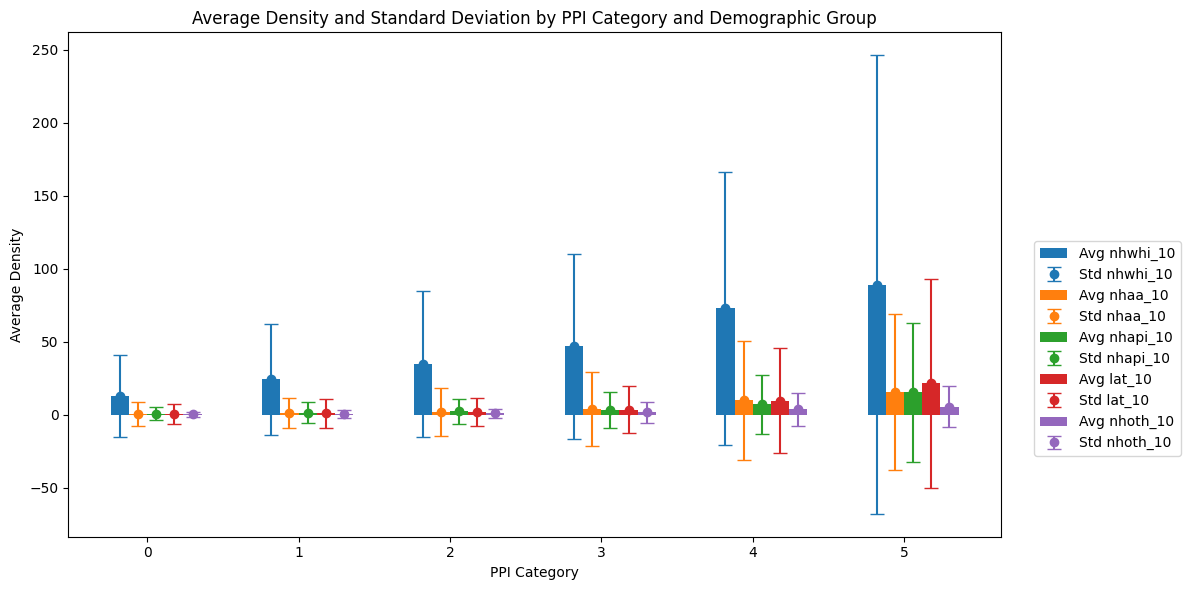

In [109]:
# Define demographic groups
demographic_groups = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']

# Data for each 'ppi5' category
ppi_categories = ['0', '1', '2', '3', '4', '5']
ppi_avgs = [ppi_df0_avg, ppi_df1_avg, ppi_df2_avg, ppi_df3_avg, ppi_df4_avg, ppi_df5_avg]
ppi_stds = [ppi_df0_std, ppi_df1_std, ppi_df2_std, ppi_df3_std, ppi_df4_std, ppi_df5_std]

# Create a bar chart for each demographic group
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12 # Width of each bar

for i, group in enumerate(demographic_groups):
    avg_values = [avg[group] for avg in ppi_avgs]
    std_values = [std[group] for std in ppi_stds]

    x = [j + i * width for j in range(len(ppi_categories))]
    plt.bar(x, avg_values, width=width, label=f'Avg {group}')
    plt.errorbar(x, avg_values, yerr=std_values, fmt='o', label=f'Std {group}', capsize=5)

plt.xlabel('PPI Category')
plt.ylabel('Average Density')
plt.title('Average Density and Standard Deviation by PPI Category and Demographic Group')
plt.xticks([i + 1.5 * width for i in range(len(ppi_categories))], ppi_categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.6))
plt.tight_layout()
plt.show()

### CENSUS DATA

In [110]:
# Specify the income range categories
air_data= pd.read_csv('./Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv')
DP03 = pd.read_csv('./Data/Census/DP03_Cleaned.csv')

first = DP03['Percent_Total_Households_Income_and_Benefits_Less than $10,000'].mean()

second = DP03['Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999'].mean()

third = DP03['Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999'].mean()

fourth = DP03['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

fifth = DP03['Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999'].mean()

sixth = DP03['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

seventh = DP03['Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999'].mean() 

eight = DP03['Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999'].mean()

nine = DP03['Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999'].mean()

ten = DP03['Percent_Total_Households_Income_and_Benefits_$200,000 or more'].mean()


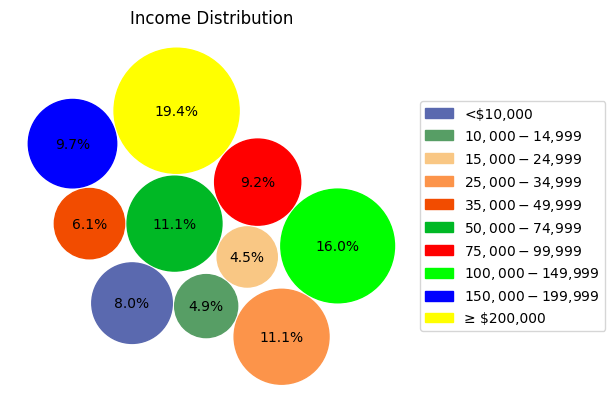

In [111]:
class BubbleChart:
    def __init__(self, income_means, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        income_means : array-like
            Mean income values for different categories.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.
        """
        income_means = np.asarray(income_means)
        r = np.sqrt(income_means / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(income_means), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = income_means
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _ in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            if i < len(labels) and i < len(colors):
                # Scale the radius to increase the bubble size
                radius = 1 * self.bubbles[i, 2]
                circ = plt.Circle(
                    self.bubbles[i, :2], radius, color=colors[i])
                ax.add_patch(circ)
                
    
                percentage = (self.bubbles[i, 3] / np.sum(self.bubbles[:, 3])) * 100
                ax.text(*self.bubbles[i, :2], f"{percentage:.1f}%",
                        horizontalalignment='center', verticalalignment='center')
        
        legend_labels = [f'{label}' for label in labels]
        ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

income_means = [first, second, third, fourth, fifth, sixth, seventh, eight, nine, ten]
labels = ['<$10,000', '$10,000-$14,999', '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', '≥ $200,000']
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']

bubble_chart = BubbleChart(income_means, bubble_spacing=0.1)
bubble_chart.collapse()
custom_colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, labels, colors= custom_colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Income Distribution')

plt.show()

In [116]:
#Importing the AQI dataset
AQI_file_path = './Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv'
AQI = pd.read_csv(AQI_file_path)

#Importing the DP02 dataset
DP02_file_path = "./Data/Census/DP02_Cleaned.csv"
DP02 = pd.read_csv(DP02_file_path)

#Merging DP02 and AQI on zipcodes.
DP02_AQI = AQI.merge(DP02, left_on='zip_code', right_on='Zipcode', how='inner')

#Importng the DP03 dataset
DP03_file_path = "./Data/Census/DP03_Cleaned.csv"
DP03 = pd.read_csv(DP03_file_path)

#Merging DP03 and AQI on zipcodes.
DP03_AQI = AQI.merge(DP03, left_on='zip_code', right_on='Zipcode', how='inner')

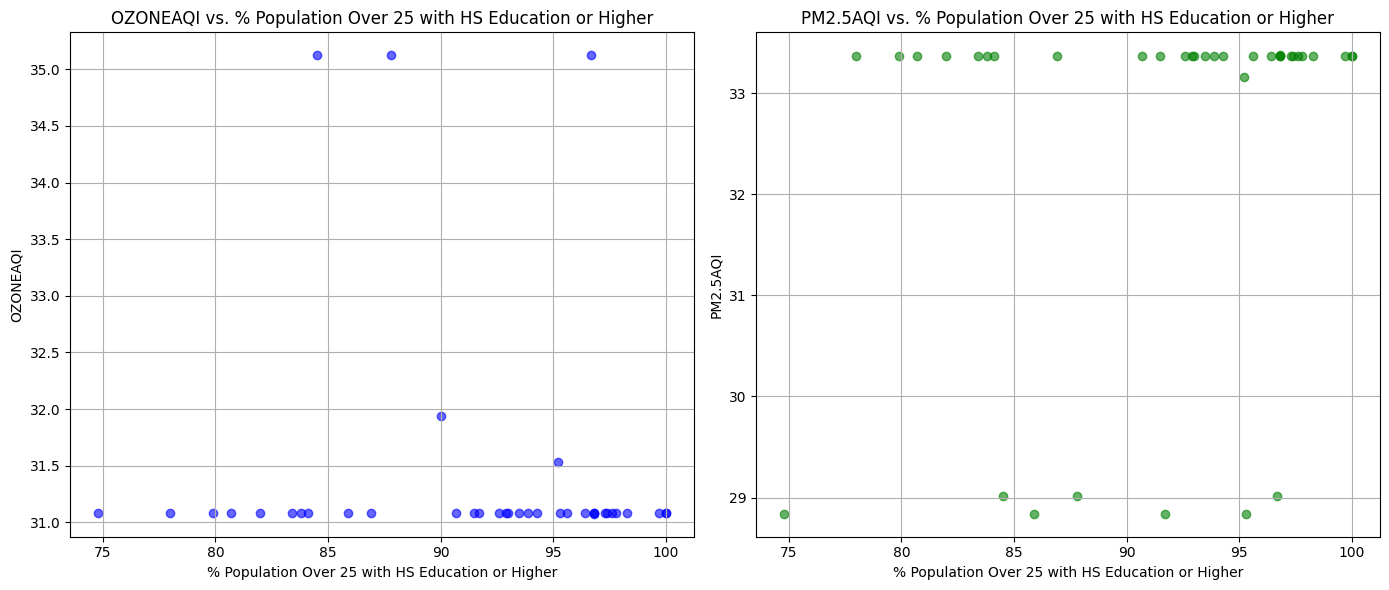

In [117]:
# Scatter plot for OZONEAQI vs Percent_Population_Over_25_Education_Attainment_High school graduate or higher
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(DP02_AQI['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            DP02_AQI['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Percent_Population_Over_25_Education_Attainment_High school graduate or higher
plt.subplot(1, 2, 2)
plt.scatter(DP02_AQI['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            DP02_AQI['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

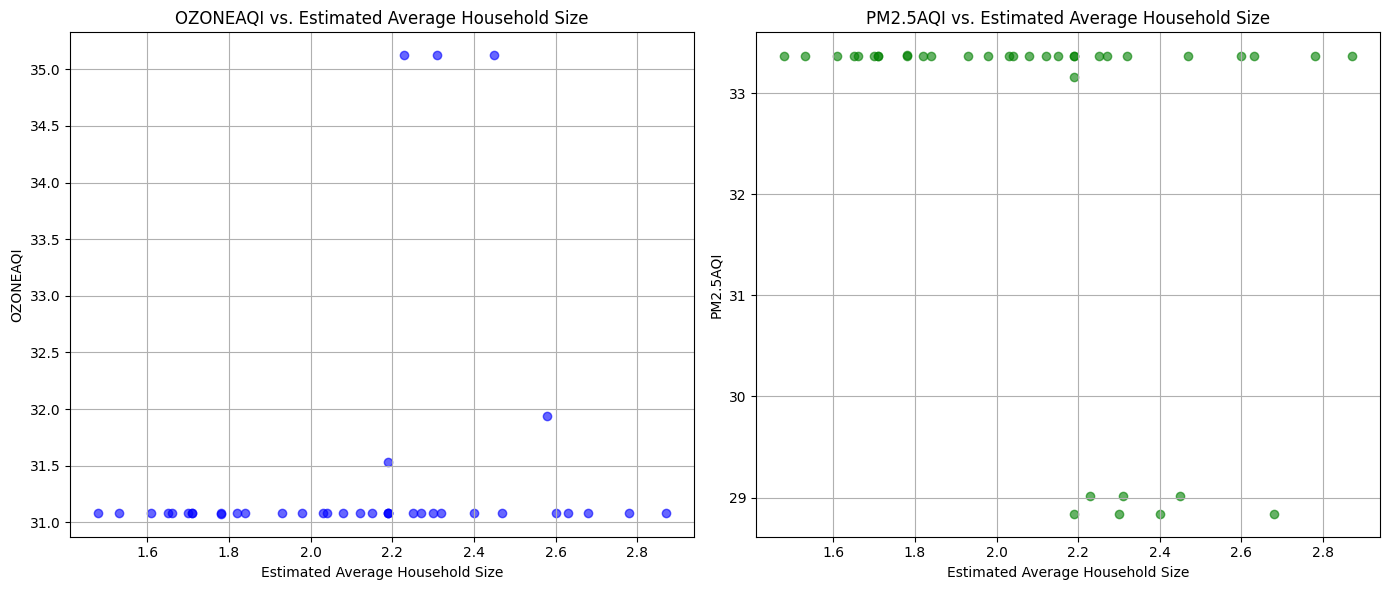

In [118]:
# Scatter plot for OZONEAQI vs Estimated_Average_Household_Size
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(DP02_AQI['Estimated_Average_Household_Size'], DP02_AQI['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Estimated_Average_Household_Size
plt.subplot(1, 2, 2)
plt.scatter(DP02_AQI['Estimated_Average_Household_Size'], DP02_AQI['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()


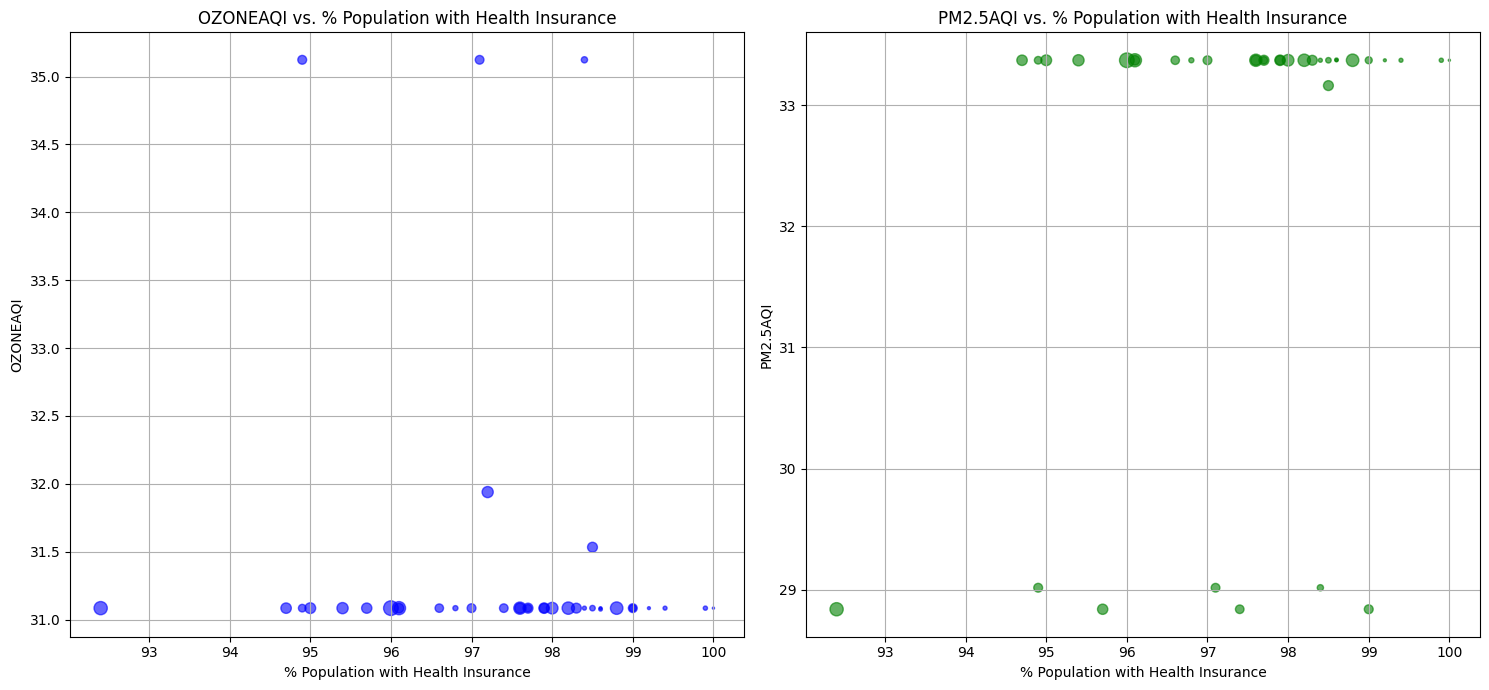

In [119]:
# Bubble plot for OZONEAQI vs Percent with health insurance coverage
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(DP03_AQI['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            DP03_AQI['OZONEAQI'], 
            s=DP03_AQI['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Bubble plot for PM2.5AQI vs Percent with health insurance coverage
plt.subplot(1, 2, 2)
plt.scatter(DP03_AQI['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            DP03_AQI['PM2.5AQI'], 
            s=DP03_AQI['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

# MEDHA

# MAX

# CAN

In [31]:
merged_data_can = pd.read_csv('./Merged_AQI_DP/AQI_DP2_3_4_5.csv')

In [32]:
merged_data_can.columns[:32]

Index(['Zipcode', 'OZONEAQI', 'PM2.5AQI', 'Estimated_Total_Households',
       'Estimated_Average_Household_Size', 'Estimated_Average_Family_Size',
       'Estimated_Total_Population_x', 'Estimated_Total_Population_Native',
       'Percent_Total_Population_Native',
       'Percent_Total_Population_Native_Born in United States',
       'Estimated_Total_Population_Native_Born in United States',
       'Estimated_Total_Population_Native_Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)',
       'Percent_Total_Population_Native_Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)',
       'Percent_Total_Population_Foreign born',
       'Estimated_Total_Population_Foreign born',
       'Percent_Foreign_Born_U.S._Citizenship_Status_Naturalized_US_cizitzen',
       'Estimated_Foreign_Born_U.S._Citizenship_Status_Naturalized U.S. citizen',
       'Percent_Foreign_Born_U.S._Citizenship_Status_Not a U.S. citizen',
       'Estimated_Foreign_Born_

In [33]:
merged_data_can.columns[-15:]

Index(['Estimated_Total_population_Not_Hispanic_or_Latino_Asian alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Some other race alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Two or more races',
       'Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
       'Percent_Total_population_Hispanic_or_Latino_Cuban',
       'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
       'Percent_Total_population_Hispanic_or_Latino_Mexican',
       'Percent_Total_population_Not_Hispanic_or_Latino_White alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Native 

In [34]:
percent_races_can=['Zipcode', 'OZONEAQI', 'PM2.5AQI','Percent_Total_Population_Native', 'Percent_Total_Population_Native_Born in United States',
                  'Percent_Total_Population_Native_Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)',
                  'Percent_Total_Population_Foreign born', 'Percent_Foreign_Born_U.S._Citizenship_Status_Naturalized_US_cizitzen',
                  'Percent_Foreign_Born_U.S._Citizenship_Status_Not a U.S. citizen', 'Percent_Foreign_Born_World_Wide_Europe',
                  'Percent_Foreign_Born_World_Wide_Asia ','Percent_Foreign_Born_World_Wide_Africa','Percent_Foreign_Born_World_Wide_Oceania',
       'Percent_Foreign_Born_World_Wide_Latin America','Percent_Foreign_Born_World_Wide_Northern America', 'Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
       'Percent_Total_population_Hispanic_or_Latino_Cuban',
       'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
       'Percent_Total_population_Hispanic_or_Latino_Mexican',
       'Percent_Total_population_Not_Hispanic_or_Latino_White alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Some other race alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Two or more races']

In [35]:
percent_races_can

['Zipcode',
 'OZONEAQI',
 'PM2.5AQI',
 'Percent_Total_Population_Native',
 'Percent_Total_Population_Native_Born in United States',
 'Percent_Total_Population_Native_Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)',
 'Percent_Total_Population_Foreign born',
 'Percent_Foreign_Born_U.S._Citizenship_Status_Naturalized_US_cizitzen',
 'Percent_Foreign_Born_U.S._Citizenship_Status_Not a U.S. citizen',
 'Percent_Foreign_Born_World_Wide_Europe',
 'Percent_Foreign_Born_World_Wide_Asia ',
 'Percent_Foreign_Born_World_Wide_Africa',
 'Percent_Foreign_Born_World_Wide_Oceania',
 'Percent_Foreign_Born_World_Wide_Latin America',
 'Percent_Foreign_Born_World_Wide_Northern America',
 'Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
 'Percent_Total_population_Hispanic_or_Latino_Cuban',
 'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
 'Percent_Total_population_Hispanic_or_Latino_Mexican',
 'Percent_Total_population_Not_Hispanic_or_Latino_Whi

## For Demographic and Housing Estimates

First, I will do my analysis in a broad look by comparing native and foreign born...

### Natives vs. Foreigns

In [55]:
df_foreign_native=merged_data_can[['Zipcode', 'OZONEAQI', 'PM2.5AQI','Percent_Total_Population_Native','Percent_Total_Population_Foreign born']]

df_foreign_native.head()


,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born
0,2045,35.123636,29.016807,94.5,5.5
1,2108,31.083799,33.369863,84.6,15.4
2,2109,31.075630,33.373626,84.9,15.1
3,2110,31.083799,33.369863,78.8,21.2
4,2111,31.083799,33.369863,54.0,46.0


In [56]:
print(f"The range of Ozone levels is: {np.round(df_foreign_native['OZONEAQI'].min(),decimals=3)}-{np.round(df_foreign_native['OZONEAQI'].max(),decimals=3)}")

print(f"The range of pm levels is: {np.round(df_foreign_native['PM2.5AQI'].min(),decimals=3)}-{np.round(df_foreign_native['PM2.5AQI'].max(),decimals=3)}")


The range of Ozone levels is: 31.076-35.124
The range of pm levels is: 28.839-33.374


In [57]:
df_foreign_native['Is_Native_Majority']=df_foreign_native['Percent_Total_Population_Native'].apply(lambda x: True if x > 50.0 else False)



/var/folders/_f/tz2yk7vs7yx8cp4kyxh06s2r0000gn/T/ipykernel_14007/694185180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foreign_native['Is_Native_Majority']=df_foreign_native['Percent_Total_Population_Native'].apply(lambda x: True if x > 50.0 else False)


In [58]:
df_foreign_native

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born,Is_Native_Majority
0,2045,35.123636,29.016807,94.5,5.5,True
1,2108,31.083799,33.369863,84.6,15.4,True
2,2109,31.075630,33.373626,84.9,15.1,True
3,2110,31.083799,33.369863,78.8,21.2,True
4,2111,31.083799,33.369863,54.0,46.0,True
5,2113,31.083799,33.369863,87.8,12.2,True
6,2114,31.083799,33.369863,77.9,22.1,True
7,2115,31.083799,33.369863,73.3,26.7,True
8,2116,31.083799,33.369863,78.0,22.0,True
9,2118,31.083799,33.369863,71.8,28.2,True


In [106]:
df_foreign_native['OZONEAQI'].value_counts()

31.083799    32
35.123636     3
31.532738     1
31.075630     1
31.938953     1
Name: OZONEAQI, dtype: int64

In [103]:
df_foreign_native['PM2.5AQI'].value_counts()

33.369863    28
28.839335     4
29.016807     3
33.373626     1
33.160819     1
Name: PM2.5AQI, dtype: int64

In [73]:
df_foreign_native['Is_Native_Majority'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

As can be seen above, and as expected, natives prevail the population in each zipcode. So we can't make an analysis as such that the the ozone level is high at places where natives or foreigns are the majority. Hence, we need to use other variables to do further analysis.

In [79]:
rows_with_highestozons=df_foreign_native[df_foreign_native['OZONEAQI']==df_foreign_native['OZONEAQI'].max()]
rows_with_highestozons

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born,Is_Native_Majority
0,2045,35.123636,29.016807,94.5,5.5,True
33,2170,35.123636,29.016807,64.3,35.7,True
34,2171,35.123636,29.016807,63.2,36.8,True


In [80]:
rows_with_highest_pm=df_foreign_native[df_foreign_native['PM2.5AQI']==df_foreign_native['PM2.5AQI'].max()]
rows_with_highest_pm

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born,Is_Native_Majority
2,2109,31.07563,33.373626,84.9,15.1,True


In [83]:
foreign_native_row_highestozon1=np.array([rows_with_highestozons['Percent_Total_Population_Native'].iloc[0], rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[0]])
                                        
foreign_native_row_highestozon2=np.array([rows_with_highestozons['Percent_Total_Population_Native'].iloc[1], rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[1]])

foreign_native_row_highestozon3=np.array([rows_with_highestozons['Percent_Total_Population_Native'].iloc[2], rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[2]])

foreign_native_labels=['Percent_Total_Population_Native', 'Percent_Total_Population_Foreign born']
    

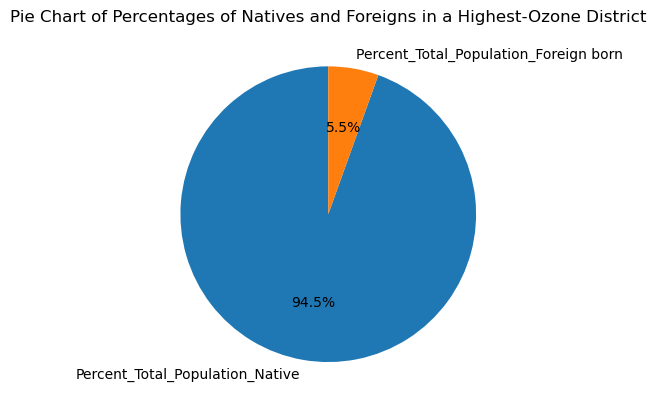

In [85]:
plt.pie(foreign_native_row_highestozon1, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

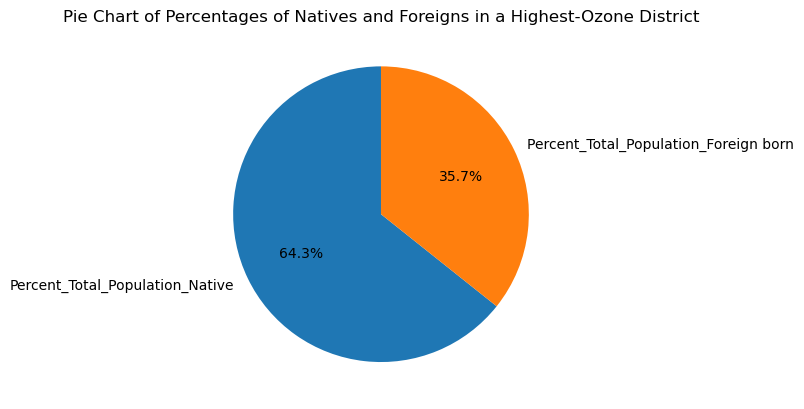

In [86]:
plt.pie(foreign_native_row_highestozon2, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

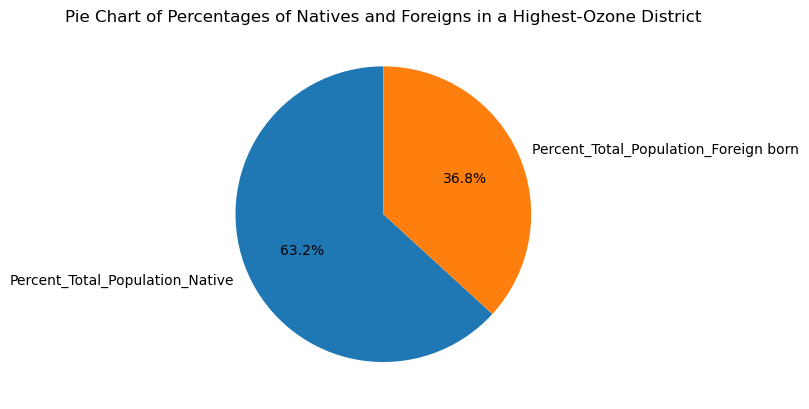

In [87]:
plt.pie(foreign_native_row_highestozon3, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

For the district with lowest ozon level

In [113]:
rows_with_lowestozons=df_foreign_native[df_foreign_native['OZONEAQI']==df_foreign_native['OZONEAQI'].min()]
rows_with_lowestozons

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born,Is_Native_Majority
2,2109,31.07563,33.373626,84.9,15.1,True


In [116]:
rows_with_lowestozon1=np.array([rows_with_lowestozons['Percent_Total_Population_Native'].iloc[0], rows_with_lowestozons['Percent_Total_Population_Foreign born'].iloc[0]])


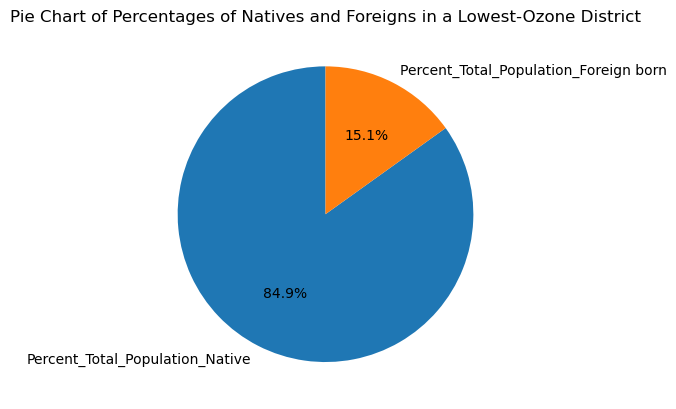

In [117]:
plt.pie(rows_with_lowestozon1, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Lowest-Ozone District')
plt.show()

But the same thing applies for the district with lowest ozone level. 

The highest pm level is probed in the district in which the percentage of the natives is much higher than foriegns:

In [88]:
foreign_native_row_highestpm=np.array([rows_with_highest_pm['Percent_Total_Population_Native'].iloc[0], rows_with_highest_pm['Percent_Total_Population_Foreign born'].iloc[0]])


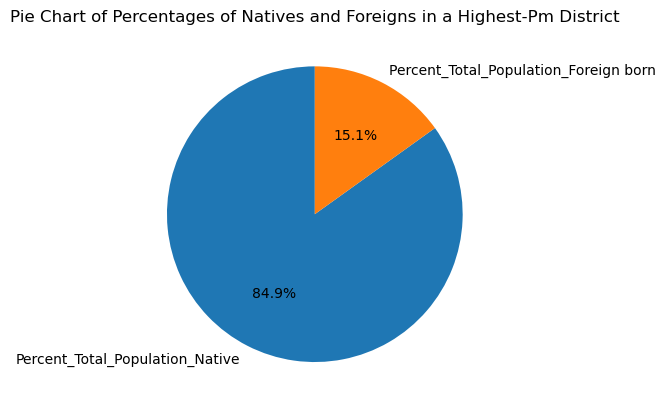

In [89]:
plt.pie(foreign_native_row_highestpm, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Pm District')
plt.show()

In [156]:
rows_with_lowestpm=df_foreign_native[df_foreign_native['PM2.5AQI']==df_foreign_native['PM2.5AQI'].min()]
rows_with_lowestpm

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_Population_Native,Percent_Total_Population_Foreign born,Is_Native_Majority
17,2128,31.083799,28.839335,53.8,46.2,True
18,2129,31.083799,28.839335,83.9,16.1,True
30,2145,31.083799,28.839335,66.2,33.8,True
31,2152,31.083799,28.839335,82.4,17.6,True


Without the need of pie charts, we can spot that the conclusion is the same.

But what we can further do is we can take the averages of the rows and for Percent_Total_Population_Native column and Percent_Total_Population_Foreign born column and observe the population ratio.

### For Ozon Metric 

In [166]:
ozone_max_means=[rows_with_highestozons['Percent_Total_Population_Native'].mean(axis=0),rows_with_highestozons['Percent_Total_Population_Foreign born'].mean(axis=0)]


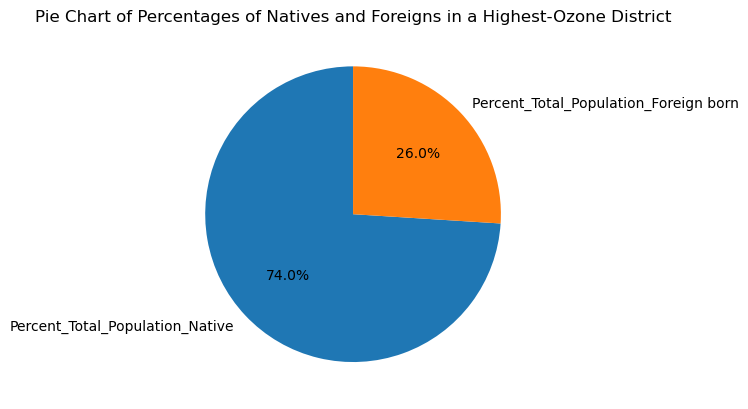

In [167]:
plt.pie(ozone_max_means, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

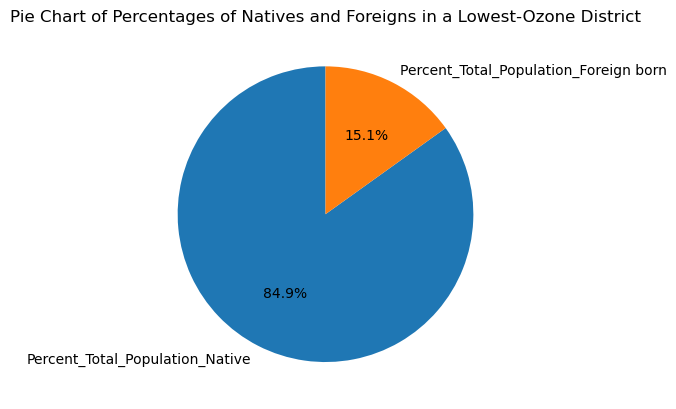

In [168]:
plt.pie(rows_with_lowestozon1, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Lowest-Ozone District')
plt.show()

Therefore, we can observe that as percent of foreign population increases the air quality gets worse by looking at ozone metric.

### For PM Metric 

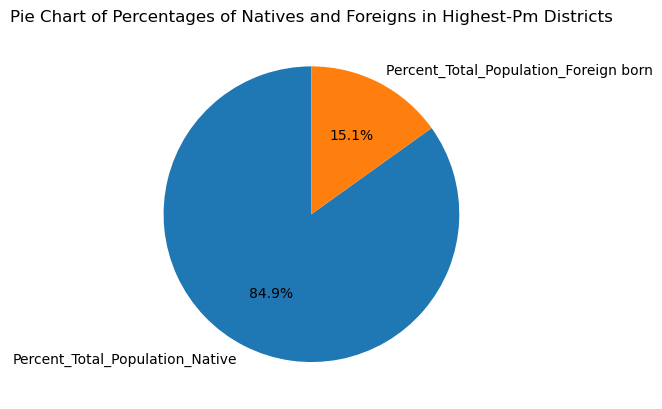

In [176]:
plt.pie(foreign_native_row_highestpm, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in Highest-Pm Districts')
plt.show()

In [170]:
pm_min_means=[rows_with_lowestpm['Percent_Total_Population_Native'].mean(axis=0),rows_with_lowestpm['Percent_Total_Population_Foreign born'].mean(axis=0)]


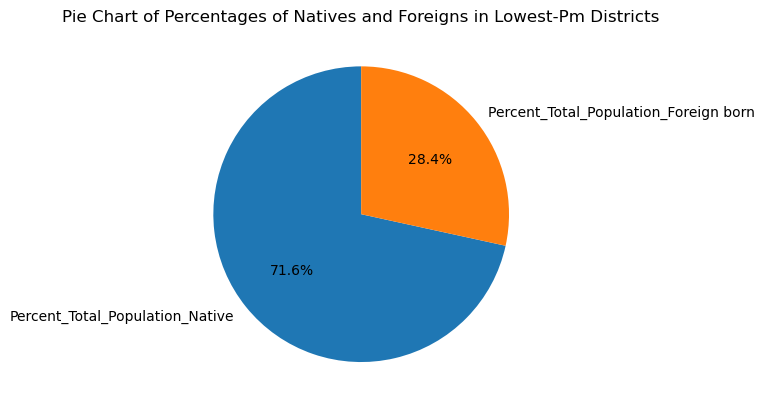

In [177]:
plt.pie(pm_min_means, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in Lowest-Pm Districts')
plt.show()

Different conclusion made with ozone metric: as percent of foreign population increases the air quality gets better by looking at pm metric.

### So we can't make a consistent analysis using columns for Natives and Foreigns!!!

In [75]:
len(percent_races_can)-3

23

### There are 23 columns that represents an ethnicity or race. But we can't compare all of these columns since some set of columns are subset of another column. So comparing dependent columns would not yield an accurate analysis.

For example, we can't compare the set of columns where these columns are inside this set 'Percent_Foreign_Born_World_Wide_Europe', 'Percent_Foreign_Born_World_Wide_Latin America', 'Percent_Total_population_Hispanic_or_Latino_Mexican', 'Percent_Total_population_Not_Hispanic_or_Latino_White alone'. This is because 'Percent_Total_population_Hispanic_or_Latino_Mexican' and 'Percent_Total_population_Not_Hispanic_or_Latino_White form a subset of 'Percent_Foreign_Born_World_Wide_Latin America'.

### Here are the comparisions of independent columns, or in other words columns whose values sum up to 100%:

## For Hispanics and non-Hispanics

In [132]:
independent_columns1=['Zipcode', 'OZONEAQI', 'PM2.5AQI']

independent_columns1_hispanic=['Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
 'Percent_Total_population_Hispanic_or_Latino_Cuban',
 'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
 'Percent_Total_population_Hispanic_or_Latino_Mexican']

independent_columns1_not_hispanic= ['Percent_Total_population_Not_Hispanic_or_Latino_White alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Some other race alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Two or more races']



In [135]:
merged_data_can[independent_columns1+independent_columns1_hispanic+independent_columns1_not_hispanic].head()

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino,Percent_Total_population_Hispanic_or_Latino_Cuban,Percent_Total_population_Hispanic_or_Latino_Puerto Rican,Percent_Total_population_Hispanic_or_Latino_Mexican,Percent_Total_population_Not_Hispanic_or_Latino_White alone,Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone,Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone,Percent_Total_population_Not_Hispanic_or_Latino_Asian alone,Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone,Percent_Total_population_Not_Hispanic_or_Latino_Some other race alone,Percent_Total_population_Not_Hispanic_or_Latino_Two or more races
0,2045,35.123636,29.016807,0.7,0.0,0.1,0.2,95.3,0.3,0.0,1.4,0.0,0.4,1.5
1,2108,31.083799,33.369863,3.7,0.3,3.0,0.0,80.4,4.9,0.0,5.2,0.0,0.8,1.7
2,2109,31.075630,33.373626,1.6,0.0,0.0,0.0,85.7,0.7,0.0,8.6,0.0,0.3,3.1
3,2110,31.083799,33.369863,2.7,0.0,0.0,0.0,87.9,2.2,0.0,4.3,0.6,0.8,1.5
4,2111,31.083799,33.369863,6.1,0.0,1.7,1.0,37.5,1.9,0.3,47.9,0.0,0.0,3.6


In [144]:
df_comparision1=pd.DataFrame()
df_comparision1=merged_data_can[independent_columns1]
df_comparision1['Percent_Total_population_Hispanic']= merged_data_can[independent_columns1_hispanic].sum(axis=1)
df_comparision1['Percent_Total_population_Not_Hispanic_Latino']= merged_data_can[independent_columns1_not_hispanic].sum(axis=1)


df_comparision1.head()

/var/folders/_f/tz2yk7vs7yx8cp4kyxh06s2r0000gn/T/ipykernel_14007/2789424205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparision1['Percent_Total_population_Hispanic']= merged_data_can[independent_columns1_hispanic].sum(axis=1)
/var/folders/_f/tz2yk7vs7yx8cp4kyxh06s2r0000gn/T/ipykernel_14007/2789424205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparision1['Percent_Total_population_Not_Hispanic_Latino']= merged_data_can[independent_columns1_not_hispanic].sum(axis=1)


,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic,Percent_Total_population_Not_Hispanic_Latino
0,2045,35.123636,29.016807,1.0,98.9
1,2108,31.083799,33.369863,7.0,93.0
2,2109,31.075630,33.373626,1.6,98.4
3,2110,31.083799,33.369863,2.7,97.3
4,2111,31.083799,33.369863,8.8,91.2


### For Ozone Metric

In [145]:
rows_with_highestozons1=df_comparision1[df_comparision1['OZONEAQI']==df_comparision1['OZONEAQI'].max()]
rows_with_highestozons1

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic,Percent_Total_population_Not_Hispanic_Latino
0,2045,35.123636,29.016807,1.0,98.9
33,2170,35.123636,29.016807,3.0,96.9
34,2171,35.123636,29.016807,4.1,96.0


In [172]:
ozone_max_means1=[rows_with_highestozons1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_highestozons1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]


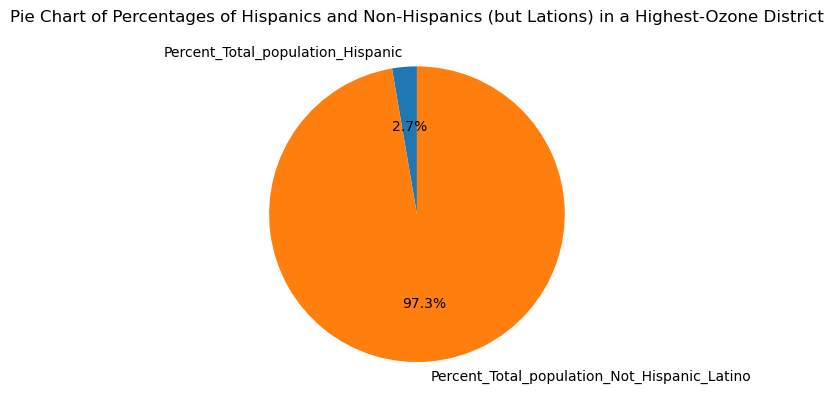

In [173]:
hispanic_nothispanic_labels= ['Percent_Total_population_Hispanic','Percent_Total_population_Not_Hispanic_Latino']
plt.pie(ozone_max_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Highest-Ozone District')
plt.show()

In [152]:
rows_with_lowestozons1=df_comparision1[df_comparision1['OZONEAQI']==df_comparision1['OZONEAQI'].min()]
rows_with_lowestozons1

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic,Percent_Total_population_Not_Hispanic_Latino
2,2109,31.07563,33.373626,1.6,98.4


In [153]:
row_lowestozon=np.array([rows_with_highestozons1['Percent_Total_population_Hispanic'].iloc[0], rows_with_highestozons1['Percent_Total_population_Not_Hispanic_Latino'].iloc[0]])


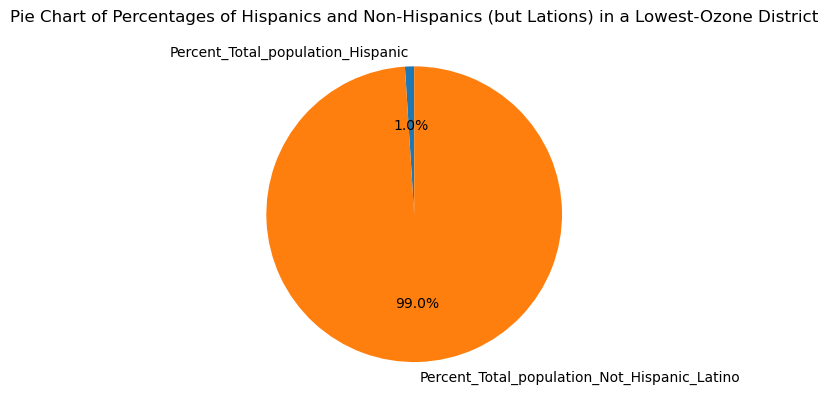

In [297]:
plt.pie(row_lowestozon, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Lowest-Ozone District')
plt.show()

Therefore, we can observe that as the percent of Hispanic population increases the air quality gets worse by looking at ozone metric.

### For PM metric

In [322]:
rows_with_highestpm1=df_comparision1[df_comparision1['PM2.5AQI']==df_comparision1['PM2.5AQI'].max()]
rows_with_highestpm1

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic,Percent_Total_population_Not_Hispanic_Latino
2,2109,31.07563,33.373626,1.6,98.4


In [323]:
pm_max_means1=[rows_with_highestpm1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_highestpm1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]


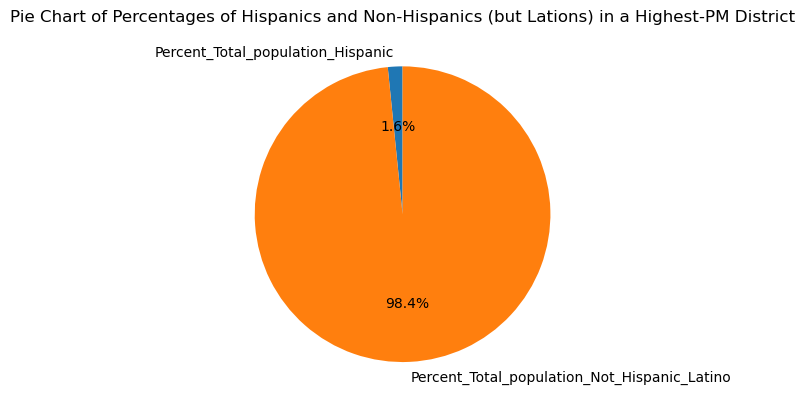

In [324]:
plt.pie(pm_max_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Highest-PM District')
plt.show()

In [325]:
rows_with_lowestpm1=df_comparision1[df_comparision1['PM2.5AQI']==df_comparision1['PM2.5AQI'].min()]
rows_with_lowestpm1

,Zipcode,OZONEAQI,PM2.5AQI,Percent_Total_population_Hispanic,Percent_Total_population_Not_Hispanic_Latino
17,2128,31.083799,28.839335,55.5,44.4
18,2129,31.083799,28.839335,9.2,91.0
30,2145,31.083799,28.839335,22.7,77.4
31,2152,31.083799,28.839335,13.4,86.6


In [326]:
pm_min_means1=[rows_with_lowestpm1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_lowestpm1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]



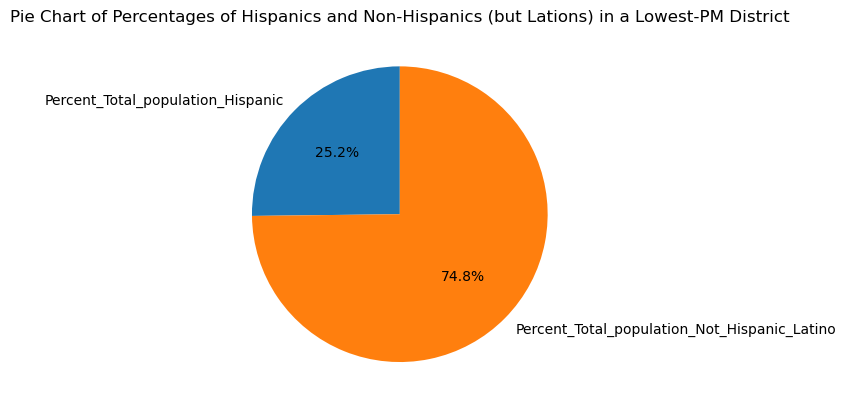

In [328]:
plt.pie(pm_min_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Lowest-PM District')
plt.show()

Different conclusion made with ozone metric: we can observe that as the percent of Hispanic population increases the air quality gets better by looking at ozone metric.

# Air quality based on Median Income

In [181]:
income_columns=["Percent_Total_Households_Income_and_Benefits_Less than $10,000",
"Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999",
"Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999",
"Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999",
"Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999",
"Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999",
"Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999",
"Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999",
"Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999",
"Percent_Total_Households_Income_and_Benefits_$200,000 or more"]

base_columns=['Zipcode', 'OZONEAQI', 'PM2.5AQI']

In [182]:
df_income= merged_data_can[base_columns + income_columns]
df_income.head()

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
0,2045,35.123636,29.016807,3.7,1.1,4.3,4.7,5.8,12.8,10.0,24.6,9.5,23.3
1,2108,31.083799,33.369863,5.0,7.7,0.6,2.8,2.7,10.8,4.8,14.8,11.8,39.1
2,2109,31.075630,33.373626,2.4,2.1,4.0,2.1,2.0,10.5,7.4,18.5,18.8,32.2
3,2110,31.083799,33.369863,10.9,2.7,3.4,4.8,1.2,10.5,4.4,14.6,5.7,42.0
4,2111,31.083799,33.369863,15.8,7.5,7.6,6.1,8.7,8.8,6.3,8.3,5.3,25.7


Lets recall the different OZONEAQI AND PM2.5AQI values:

In [186]:
df_income['OZONEAQI'].value_counts()

31.083799    32
35.123636     3
31.532738     1
31.075630     1
31.938953     1
Name: OZONEAQI, dtype: int64

In [187]:
df_income['PM2.5AQI'].value_counts()

33.369863    28
28.839335     4
29.016807     3
33.373626     1
33.160819     1
Name: PM2.5AQI, dtype: int64

## For Ozone Metric:

In [194]:
df_income.groupby(by="OZONEAQI").groups.keys()

dict_keys([31.07563025210084, 31.083798882681567, 31.532738095238088, 31.93895348837209, 35.123636363636365])

In [201]:
ozone_levels=list(df_income.groupby(by="OZONEAQI").groups.keys())
ozone_levels.sort()

ozone_levels

[31.07563025210084,
 31.083798882681567,
 31.532738095238088,
 31.93895348837209,
 35.123636363636365]

In [211]:
ozone_row1=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[0])
ozone_row1

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
2,2109,31.07563,33.373626,2.4,2.1,4.0,2.1,2.0,10.5,7.4,18.5,18.8,32.2


In [212]:
ozone_row2=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[1])
ozone_row2

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
1,2108,31.083799,33.369863,5.0,7.7,0.6,2.8,2.7,10.8,4.8,14.8,11.8,39.1
3,2110,31.083799,33.369863,10.9,2.7,3.4,4.8,1.2,10.5,4.4,14.6,5.7,42.0
4,2111,31.083799,33.369863,15.8,7.5,7.6,6.1,8.7,8.8,6.3,8.3,5.3,25.7
5,2113,31.083799,33.369863,3.0,1.9,4.6,2.4,4.7,18.8,14.0,25.8,9.8,15.1
6,2114,31.083799,33.369863,7.4,5.4,3.3,0.9,3.9,11.2,9.2,17.7,11.6,29.2
7,2115,31.083799,33.369863,16.5,12.0,8.6,5.4,11.5,13.7,7.1,9.8,5.7,9.7
8,2116,31.083799,33.369863,8.3,5.7,5.0,4.3,3.9,7.3,7.6,14.7,8.1,34.9
9,2118,31.083799,33.369863,10.1,10.0,10.5,4.2,7.5,9.4,7.7,8.2,10.1,22.4
10,2119,31.083799,33.369863,17.5,11.4,10.8,10.3,12.2,12.2,8.0,10.0,4.1,3.4
11,2120,31.083799,33.369863,12.7,10.5,6.4,7.0,12.7,15.0,10.5,11.0,8.5,5.6


In [213]:
ozone_row3=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[2])
ozone_row3

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
29,2144,31.532738,33.160819,5.1,3.7,5.1,4.1,4.7,9.2,9.6,20.8,13.5,24.3


In [214]:
ozone_row4=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[3])
ozone_row4

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
20,2131,31.938953,NaN,5.0,4.5,6.9,4.7,7.4,13.1,13.3,15.9,13.3,15.9


In [215]:
ozone_row5=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[4])
ozone_row5

,Zipcode,OZONEAQI,PM2.5AQI,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
0,2045,35.123636,29.016807,3.7,1.1,4.3,4.7,5.8,12.8,10.0,24.6,9.5,23.3
33,2170,35.123636,29.016807,4.9,4.3,6.1,4.8,6.8,12.3,15.2,21.5,12.5,11.6
34,2171,35.123636,29.016807,5.9,4.1,5.9,2.6,7.5,17.1,9.5,20.9,10.9,15.5


In [249]:
ozone_rows=[ozone_row1,ozone_row2,ozone_row3,ozone_row4,ozone_row5]

In [264]:
income_levels_population_percents=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(ozone_rows)):
    for y in range(len(income_columns)):
        
        row=ozone_rows[x]
        
        income_levels_population_percents[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents= list(np.array(income_levels_population_percents).reshape(5,10))

income_levels_population_percents= [list(x) for x in income_levels_population_percents]


for x in range(len(ozone_levels)):
    income_levels_population_percents[x] += [np.round(ozone_levels[x],decimals=3)]



[[2.4,
  9.237499999999999,
  5.1,
  5.0,
  4.833333333333334,
  2.1,
  5.549999999999999,
  3.7,
  4.5,
  3.1666666666666665,
  31.076],
 [4.0,
  6.078125,
  5.1,
  6.9,
  5.433333333333333,
  2.1,
  4.909375000000001,
  4.1,
  4.7,
  4.033333333333333,
  31.084],
 [2.0,
  6.609375,
  4.7,
  7.4,
  6.7,
  10.5,
  11.6625,
  9.2,
  13.1,
  14.066666666666668,
  31.533],
 [7.4,
  9.496875000000001,
  9.6,
  13.3,
  11.566666666666668,
  18.5,
  16.275,
  20.8,
  15.9,
  22.333333333333332,
  31.939],
 [18.8,
  9.69375,
  13.5,
  13.3,
  10.966666666666667,
  32.2,
  20.487499999999997,
  24.3,
  15.9,
  16.8,
  35.124]]

In [269]:
df_grouped_bar=pd.DataFrame(income_levels_population_percents, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','Ozone_Level'])


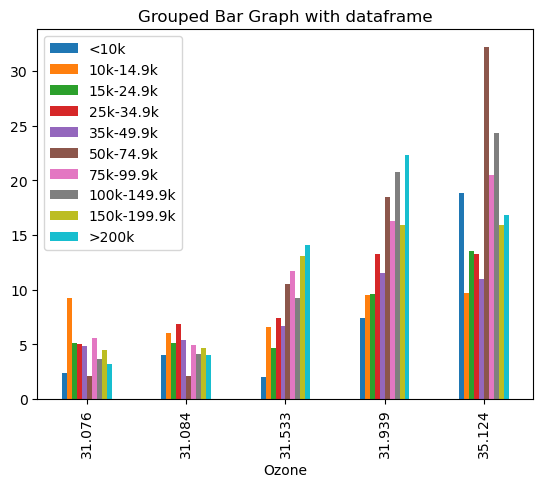

In [270]:
df_grouped_bar.plot(x='Ozone_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 


Since the ozone levels for the first 4 levels are very close we can take the average of them. And compare them with 35.124 ozone level.

In [289]:
def mean(lst): 
    return sum(lst) / len(lst)

In [294]:
#RECONSTRUCTING THE df_grouped_bar

income_levels_population_percents1=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(ozone_rows)):
    for y in range(len(income_columns)):
        
        row=ozone_rows[x]
        
        income_levels_population_percents1[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents1= list(np.array(income_levels_population_percents1).reshape(5,10))

new_rows=income_levels_population_percents1[0]+income_levels_population_percents1[1]+income_levels_population_percents1[2]+income_levels_population_percents1[3]

new_rows=new_rows/5

income_levels_population_percents2=[new_rows, income_levels_population_percents1[-1]]

income_levels_population_percents2=[list(x) for x in income_levels_population_percents2]

income_levels_population_percents2[0] += [np.round(mean(ozone_levels[:-1]),decimals=3)]
income_levels_population_percents2[-1] += [np.round(ozone_levels[-1],decimals=3)]                                       



[[3.16,
  6.284375,
  4.9,
  6.5200000000000005,
  5.706666666666666,
  6.640000000000001,
  7.6793749999999985,
  7.56,
  7.639999999999999,
  8.719999999999999,
  31.408],
 [18.8,
  9.69375,
  13.5,
  13.3,
  10.966666666666667,
  32.2,
  20.487499999999997,
  24.3,
  15.9,
  16.8,
  35.124]]

In [299]:
df_grouped_bar1=pd.DataFrame(income_levels_population_percents2, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','Ozone_Level'])



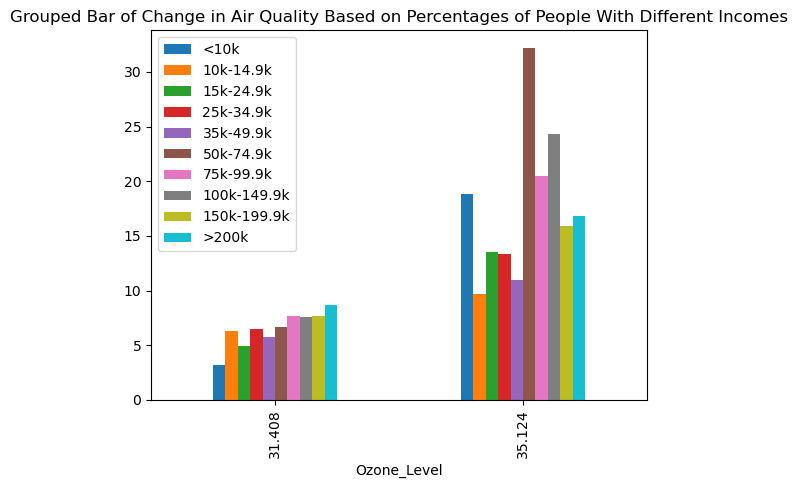

In [300]:
df_grouped_bar1.plot(x='Ozone_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes')

Therefore, we can observe that in places with good air quality, the percentage of people who make 200k is the highest. And in places with poor air quality, the percentage of people who make 50k-74.9k is the highest. 

## For PM Metric:

In [315]:
df_income.groupby(by="PM2.5AQI").groups.keys()

dict_keys([28.83933518, 29.01680672268908, 33.16081871345029, 33.369863013698634, 33.37362637362637])

In [316]:
pm_levels=list(df_income.groupby(by="PM2.5AQI").groups.keys())
pm_levels.sort()

pm_levels

[28.83933518,
 29.01680672268908,
 33.16081871345029,
 33.369863013698634,
 33.37362637362637]

Since the first two pm levels and the last three pm levels are close I will combine them accordingly

In [317]:
pm_row1=df_income.groupby(by="PM2.5AQI").get_group(ozone_levels[0])
pm_row2=df_income.groupby(by="PM2.5AQI").get_group(ozone_levels[1])
pm_row3=df_income.groupby(by="PM2.5AQI").get_group(ozone_levels[2])
pm_row4=df_income.groupby(by="PM2.5AQI").get_group(ozone_levels[3])
pm_row5=df_income.groupby(by="PM2.5AQI").get_group(ozone_levels[4])


In [318]:
pm_rows=[pm_row1,pm_row2,pm_row3, pm_row4, pm_row5]

In [319]:
income_levels_population_percents3=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(pm_rows)):
    for y in range(len(income_columns)):
        
        row=pm_rows[x]
        
        income_levels_population_percents3[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents3= list(np.array(income_levels_population_percents3).reshape(5,10))

new_rows1_1=income_levels_population_percents3[0]+income_levels_population_percents3[1]
new_rows1_2=income_levels_population_percents3[2]+income_levels_population_percents3[3]+income_levels_population_percents3[4]

new_rows1_1=new_rows1_1/2
new_rows1_2=new_rows1_2/3

income_levels_population_percents4=[new_rows1_1, new_rows1_2]

income_levels_population_percents4=[list(x) for x in income_levels_population_percents4]

income_levels_population_percents4[0] += [np.round(mean(pm_levels[:-1]),decimals=3)]
income_levels_population_percents4[-1] += [np.round(pm_levels[-1],decimals=3)]   

In [320]:
df_grouped_bar2=pd.DataFrame(income_levels_population_percents4, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','PM_Level'])



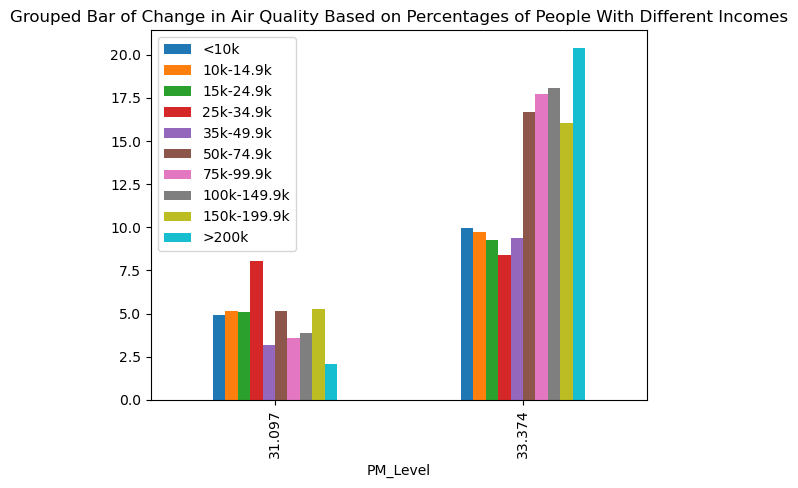

In [321]:
df_grouped_bar2.plot(x='PM_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes')

### FINAL CONCLUSION: the inferences made with ozone metric and PM metric are not consistent. This shows that the factors for the levels of these metrics can be different. For example, while the highest determinant for PM level could be combustion processes, the highest determinant for ozone level could be photochemical reactions. Even though the high amount of these metrics signfies a bad air quality, the nature of their impact may vary. And this furhter investigation exceeds the scope of this project...

# DK